In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.utils
from torchvision import models
import torchvision.datasets as dsets
import torchvision.transforms as transforms

#import detector as dt
#from mmdet.apis import init_detector, inference_detector, show_result_pyplot

import dataset as data

#sys.path.insert(1, '../adversarial-attacks-pytorch')
#import torchattacks
#from torchattacks import CustomAttack

#dt.Check()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Use load_from_local loader


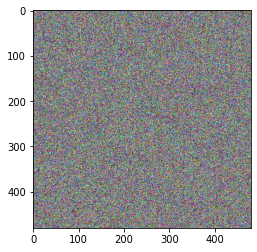

In [97]:
dataset = data.AdversarialDataset()

batch_size = 128

train_loader  = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=False)

model = dt.InitDetector(dt.ConfigFiles['faster_rcnn'], dt.CheckpointFiles['faster_rcnn'])
atk = CustomAttack(model, eps=8/255)
plt.imshow(atk.GetPatch())

In [106]:
num_epochs = 5
for epoch in range(num_epochs):

    total_batch = len(dataset) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        batch_images_attacked = atk.GetAttacked(batch_images)


        predict = inference_detector(model, batch_images)
        predict_attacked = inference_detector(model, batch_images_attacked)

        atk.TrainPatch(predict, predict_attacked)

        cost = loss(predict_attacked, predict)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, 200, cost.item()))

/media/stepan/Exterminator/Users/Степан/Desktop/учеба/Диплом/FromUbuntu/train2017/train2017/000000000009.jpg
/media/stepan/Exterminator/Users/Степан/Desktop/учеба/Диплом/FromUbuntu/train2017/train2017/000000000025.jpg
/media/stepan/Exterminator/Users/Степан/Desktop/учеба/Диплом/FromUbuntu/train2017/train2017/000000000030.jpg
/media/stepan/Exterminator/Users/Степан/Desktop/учеба/Диплом/FromUbuntu/train2017/train2017/000000000034.jpg
/media/stepan/Exterminator/Users/Степан/Desktop/учеба/Диплом/FromUbuntu/train2017/train2017/000000000036.jpg
/media/stepan/Exterminator/Users/Степан/Desktop/учеба/Диплом/FromUbuntu/train2017/train2017/000000000042.jpg
/media/stepan/Exterminator/Users/Степан/Desktop/учеба/Диплом/FromUbuntu/train2017/train2017/000000000049.jpg
/media/stepan/Exterminator/Users/Степан/Desktop/учеба/Диплом/FromUbuntu/train2017/train2017/000000000061.jpg
/media/stepan/Exterminator/Users/Степан/Desktop/учеба/Диплом/FromUbuntu/train2017/train2017/000000000064.jpg
/media/stepan/Exter

FileNotFoundError: [Errno 2] No such file or directory: 'tensor([[0.4275, 0.0941, 0.0078],\n        [0.4275, 0.0902, 0.0039],\n        [0.4353, 0.0863, 0.0039],\n        ...,\n        [0.7608, 0.6588, 0.5137],\n        [0.7725, 0.6706, 0.5255],\n        [0.7647, 0.6588, 0.5137]], dtype=torch.float64)'

/media/stepan/Exterminator/Users/Степан/Desktop/учеба/Диплом/FromUbuntu/train2017/train2017/000000000030.jpg


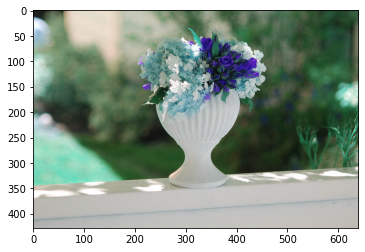

In [60]:
image, label = dataset[2]
plt.imshow(image)
#result = inference_detector(model, image)
#print(result[0])

[]


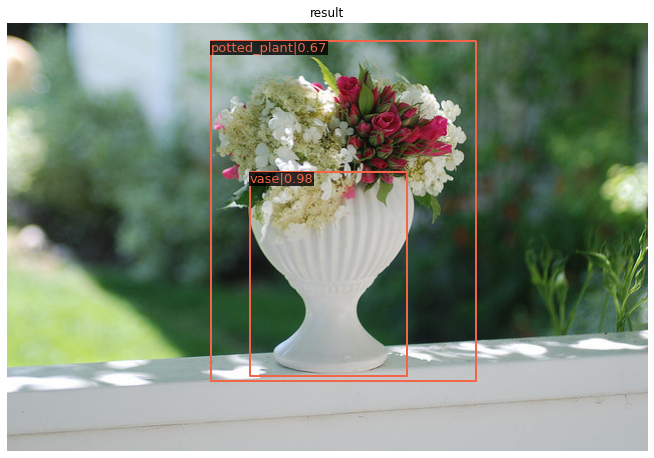

In [21]:
show_result_pyplot(model, image, result, score_thr=0.3)